<a href="https://colab.research.google.com/github/Mal-web-cmd/Python_Libraries/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


train_data = pd.read_csv('train_LZdllcl.csv')


test_data = pd.read_csv('test_2umaH9m.csv')
print(test_data.head())
print(train_data.head())


   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

<ipython-input-6-ac00a83934f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_promoted', data=train_data, palette='viridis')


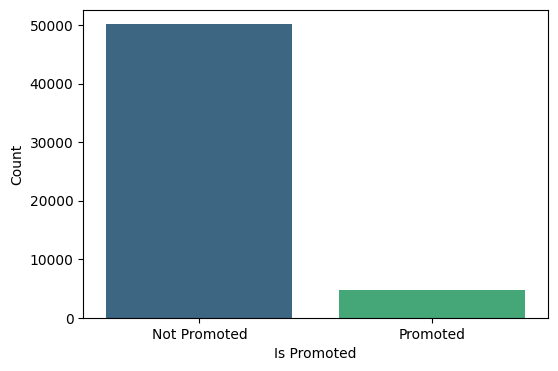

Target Variable Distribution (Percentage):
is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4))
sns.countplot(x='is_promoted', data=train_data, palette='viridis')

plt.xlabel('Is Promoted')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.show()


print("Target Variable Distribution (Percentage):")
print(train_data['is_promoted'].value_counts(normalize=True) * 100)

<ipython-input-8-64f35fdbf8fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_promoted', y=feature, data=train_data, palette='viridis')
<ipython-input-8-64f35fdbf8fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_promoted', y=feature, data=train_data, palette='viridis')
<ipython-input-8-64f35fdbf8fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_promoted', y=feature, data=train_data, palette='viridis')
<ipython-input-8-64f35fdbf8fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

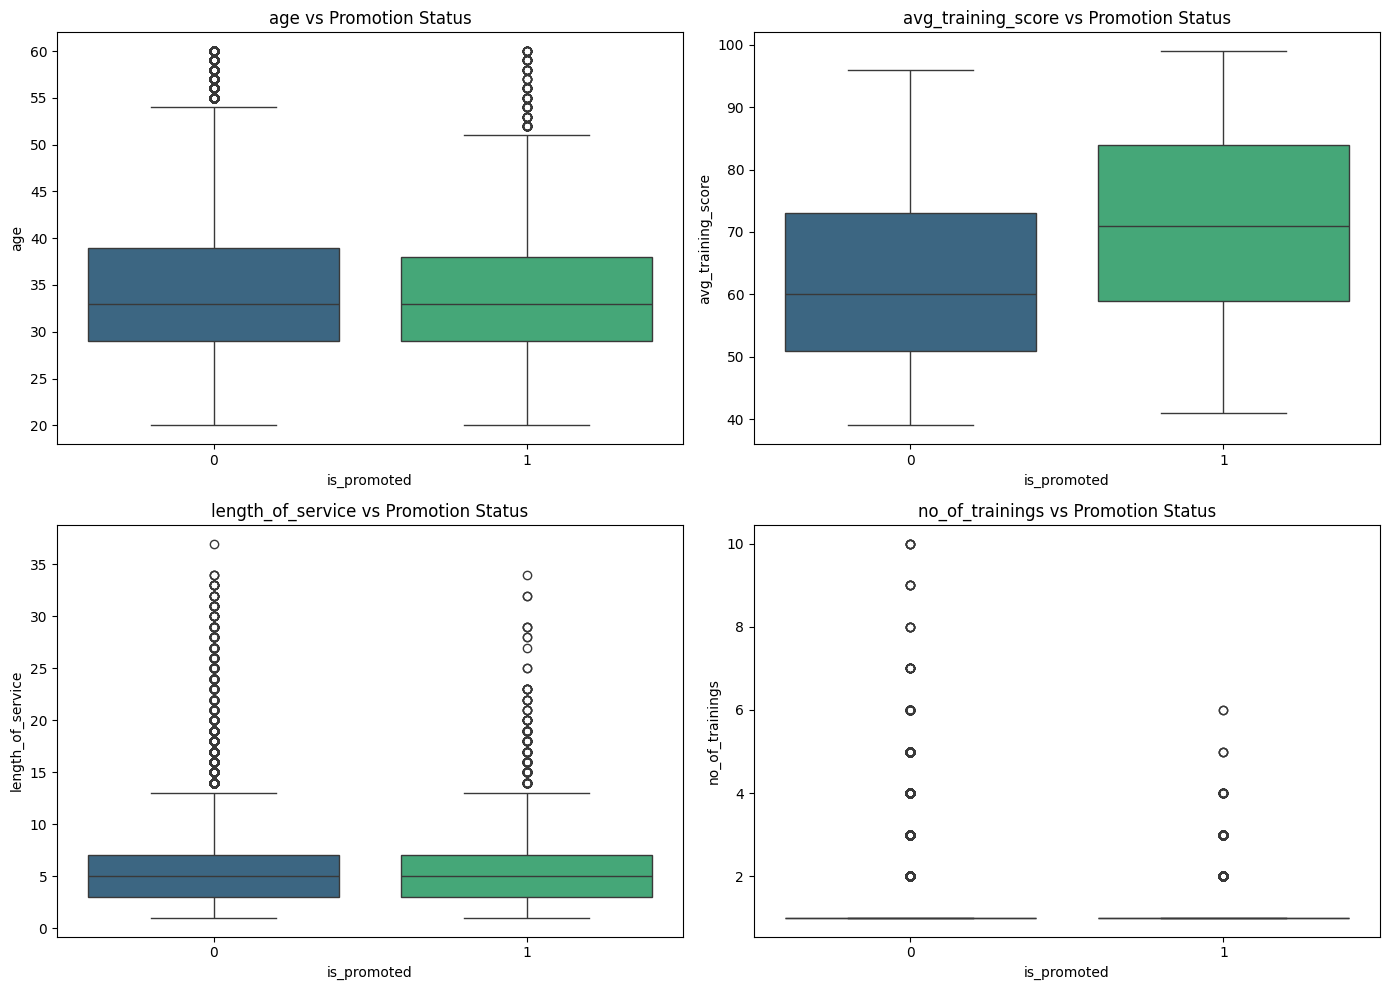

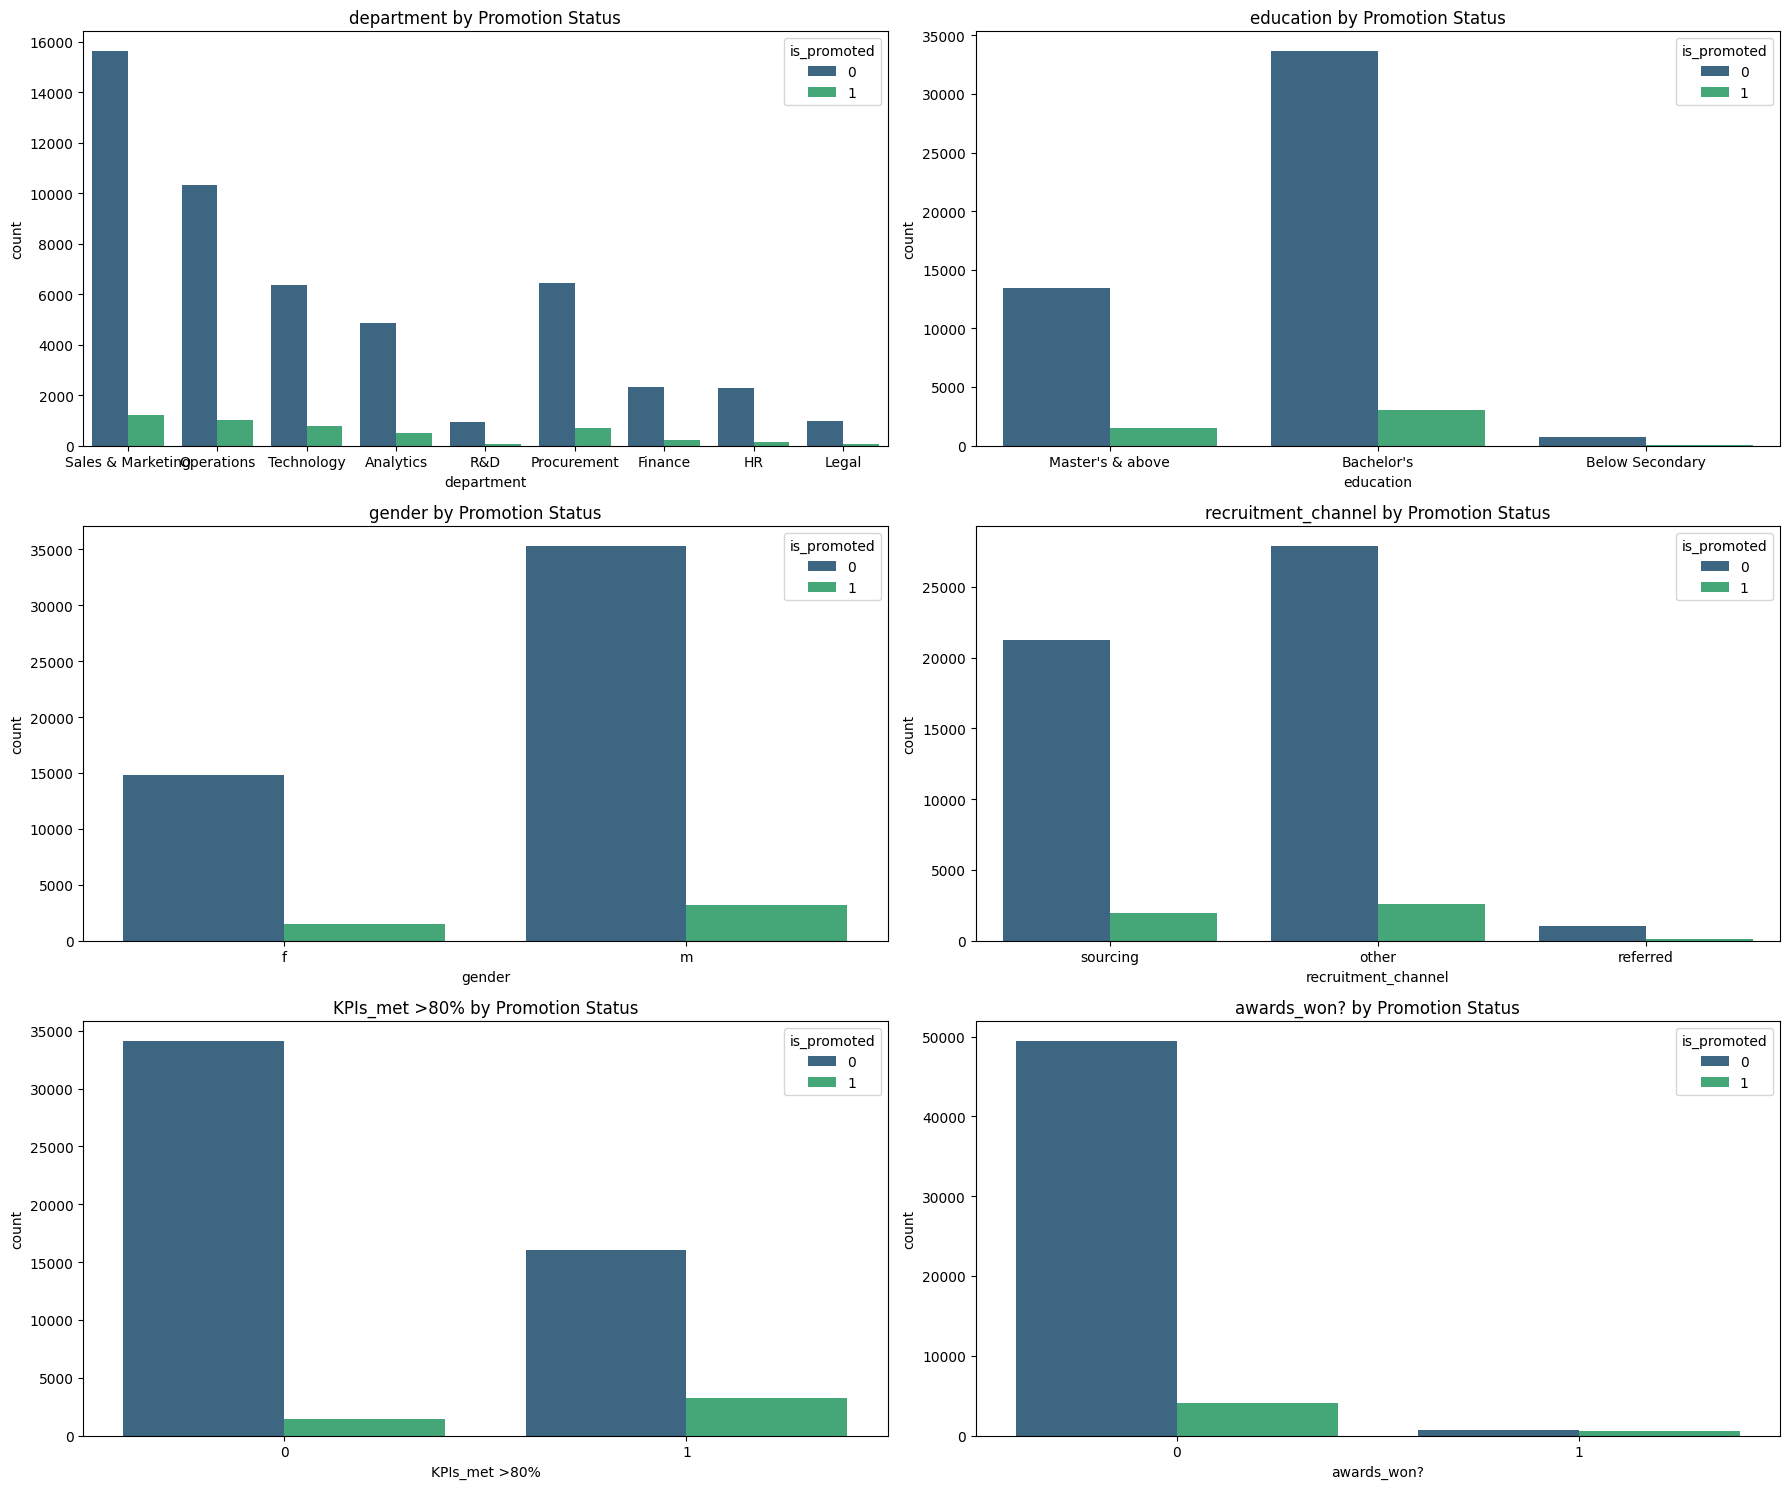

In [8]:



numerical_features = ['age', 'avg_training_score', 'length_of_service', 'no_of_trainings']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='is_promoted', y=feature, data=train_data, palette='viridis')
    plt.title(f'{feature} vs Promotion Status')
plt.tight_layout()
plt.show()


categorical_features = ['department', 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?']
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='is_promoted', data=train_data, palette='viridis')
    plt.title(f'{feature} by Promotion Status')
plt.tight_layout()
plt.show()

In [11]:
for dataset in [train_data, test_data]:
    dataset['education'].fillna(dataset['education'].mode()[0], inplace=True)

In [14]:
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for feature in categorical_features:
    train_data[feature] = pd.Categorical(train_data[feature]).codes
    test_data[feature] = pd.Categorical(test_data[feature]).codes

In [15]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
numerical_features = ['age', 'avg_training_score', 'length_of_service', 'no_of_trainings']

for dataset in [train_data, test_data]:
    dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

In [16]:
X_train = train_data.drop(['employee_id', 'is_promoted'], axis=1)
y_train = train_data['is_promoted']
X_test = test_data.drop(['employee_id'], axis=1)



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score


log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)
train_predictions = log_model.predict(X_train)


print("Logistic Regression F1 Score:", f1_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

Logistic Regression F1 Score: 0.3041859620448561
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     50140
           1       0.19      0.72      0.30      4668

    accuracy                           0.72     54808
   macro avg       0.58      0.72      0.56     54808
weighted avg       0.90      0.72      0.78     54808



In [24]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train, y_train)


train_predictions_xgb = xgb_model.predict(X_train)


print("XGBoost F1 Score:", f1_score(y_train, train_predictions_xgb))
print(classification_report(y_train, train_predictions_xgb))

XGBoost F1 Score: 0.5246322671024982
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     50140
           1       0.36      0.96      0.52      4668

    accuracy                           0.85     54808
   macro avg       0.68      0.90      0.72     54808
weighted avg       0.94      0.85      0.88     54808

